# Mineral Flotation Data Exploration

This notebook provides a comprehensive exploration of the mineral flotation raw data, including:
- Data loading and basic information
- Data quality assessment (missing values, duplicates)
- Descriptive statistics
- Time series analysis
- Distribution analysis
- Correlation analysis
- Outlier detection
- Feature relationships and insights


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Basic Information


In [3]:
# Load the data
data_path = Path('data/raw_data/raw.csv')
df = pd.read_csv(data_path)

print(f"Data shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Data shape: (1817, 10)

First few rows:


,date,ave_flot_air_flow,ave_flot_level,iron_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_pH,ore_pulp_density,silica_concentrate
0,2017-04-24 00:00:00,300.263,383.982,55.170,1979.589,599.676,400.017,9.774,1.753,4.360
1,2017-04-24 01:00:00,299.782,386.049,55.170,1758.466,600.043,400.485,9.539,1.754,3.290
2,2017-04-24 02:00:00,299.750,385.251,55.170,2379.752,599.948,400.326,9.434,1.757,4.900
3,2017-04-24 03:00:00,299.998,389.636,55.170,2287.130,599.580,399.802,9.726,1.727,4.860
4,2017-04-24 04:00:00,300.005,387.811,55.170,2291.789,599.871,399.567,9.845,1.633,4.781


In [4]:
# Basic information about the dataset
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nNumber of rows: {len(df):,}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\nData types:")
print(df.dtypes)


DATASET INFORMATION

Number of rows: 1,817
Number of columns: 10

Column names:
  1. date
  2. ave_flot_air_flow
  3. ave_flot_level
  4. iron_feed
  5. starch_flow
  6. amina_flow
  7. ore_pulp_flow
  8. ore_pulp_pH
  9. ore_pulp_density
  10. silica_concentrate

Data types:
date                   object
ave_flot_air_flow     float64
ave_flot_level        float64
iron_feed             float64
starch_flow           float64
amina_flow            float64
ore_pulp_flow         float64
ore_pulp_pH           float64
ore_pulp_density      float64
silica_concentrate    float64
dtype: object


## 2. Data Quality Assessment


In [5]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")


MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!

Total missing values: 0


In [6]:
# Check for duplicate rows
print("=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count / len(df)) * 100:.2f}%")
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("✓ No duplicate rows found!")


DUPLICATE ROWS ANALYSIS
Number of duplicate rows: 0
✓ No duplicate rows found!


In [7]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check date range and time gaps
print("=" * 60)
print("TIME SERIES INFORMATION")
print("=" * 60)
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Total time span: {df['date'].max() - df['date'].min()}")
print(f"Number of unique dates: {df['date'].nunique()}")

# Check for time gaps
df_sorted = df.sort_values('date')
time_diffs = df_sorted['date'].diff()
print(f"\nExpected hourly frequency: 1 hour")
print(f"Most common time difference: {time_diffs.mode().iloc[0] if len(time_diffs.mode()) > 0 else 'N/A'}")
print(f"Time gaps (differences > 1 hour): {(time_diffs > pd.Timedelta('1 hour')).sum()}")


TIME SERIES INFORMATION
Date range: 2017-04-24 00:00:00 to 2017-09-08 15:00:00
Total time span: 137 days 15:00:00
Number of unique dates: 1817

Expected hourly frequency: 1 hour
Most common time difference: 0 days 01:00:00
Time gaps (differences > 1 hour): 157


## 3. Descriptive Statistics


In [8]:
# Descriptive statistics for numerical columns
print("=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
numeric_cols = df.select_dtypes(include=[np.number]).columns
desc_stats = df[numeric_cols].describe()
print(desc_stats)


DESCRIPTIVE STATISTICS
       ave_flot_air_flow  ave_flot_level  iron_feed  starch_flow  amina_flow  \
count           1817.000        1817.000   1817.000     1817.000    1817.000   
mean             296.036         457.719     57.595     3106.798     502.076   
std                6.342          66.964      5.754      831.195      65.958   
min              282.466         306.749     43.370      401.629     301.264   
25%              291.643         408.780     52.670     2554.580     454.770   
50%              299.860         421.506     57.380     3144.695     509.369   
75%              299.962         500.251     64.030     3648.293     553.007   
max              301.339         767.640     65.780     5556.094     715.748   

       ore_pulp_flow  ore_pulp_pH  ore_pulp_density  silica_concentrate  
count       1817.000     1817.000          1817.000            1817.000  
mean         400.015        9.896             1.682               2.162  
std            0.866        0.298 

In [9]:
# Additional statistics: skewness and kurtosis
print("\n" + "=" * 60)
print("SKEWNESS AND KURTOSIS")
print("=" * 60)

additional_stats = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurtosis()
})
additional_stats = additional_stats.sort_values('Skewness', key=abs, ascending=False)
print(additional_stats)

print("\nInterpretation:")
print("- Skewness: |value| > 0.5 indicates moderate skewness, |value| > 1 indicates high skewness")
print("- Kurtosis: |value| > 0.5 indicates heavy tails (leptokurtic) or light tails (platykurtic)")



SKEWNESS AND KURTOSIS
                    Skewness  Kurtosis
ave_flot_air_flow     -1.236    -0.153
silica_concentrate     1.157     0.468
ave_flot_level         0.728    -0.245
ore_pulp_density      -0.610     0.003
amina_flow            -0.356    -0.464
ore_pulp_pH           -0.257     0.148
iron_feed             -0.225    -1.200
ore_pulp_flow          0.215     1.641
starch_flow           -0.087     0.003

Interpretation:
- Skewness: |value| > 0.5 indicates moderate skewness, |value| > 1 indicates high skewness
- Kurtosis: |value| > 0.5 indicates heavy tails (leptokurtic) or light tails (platykurtic)


## 4. Time Series Analysis


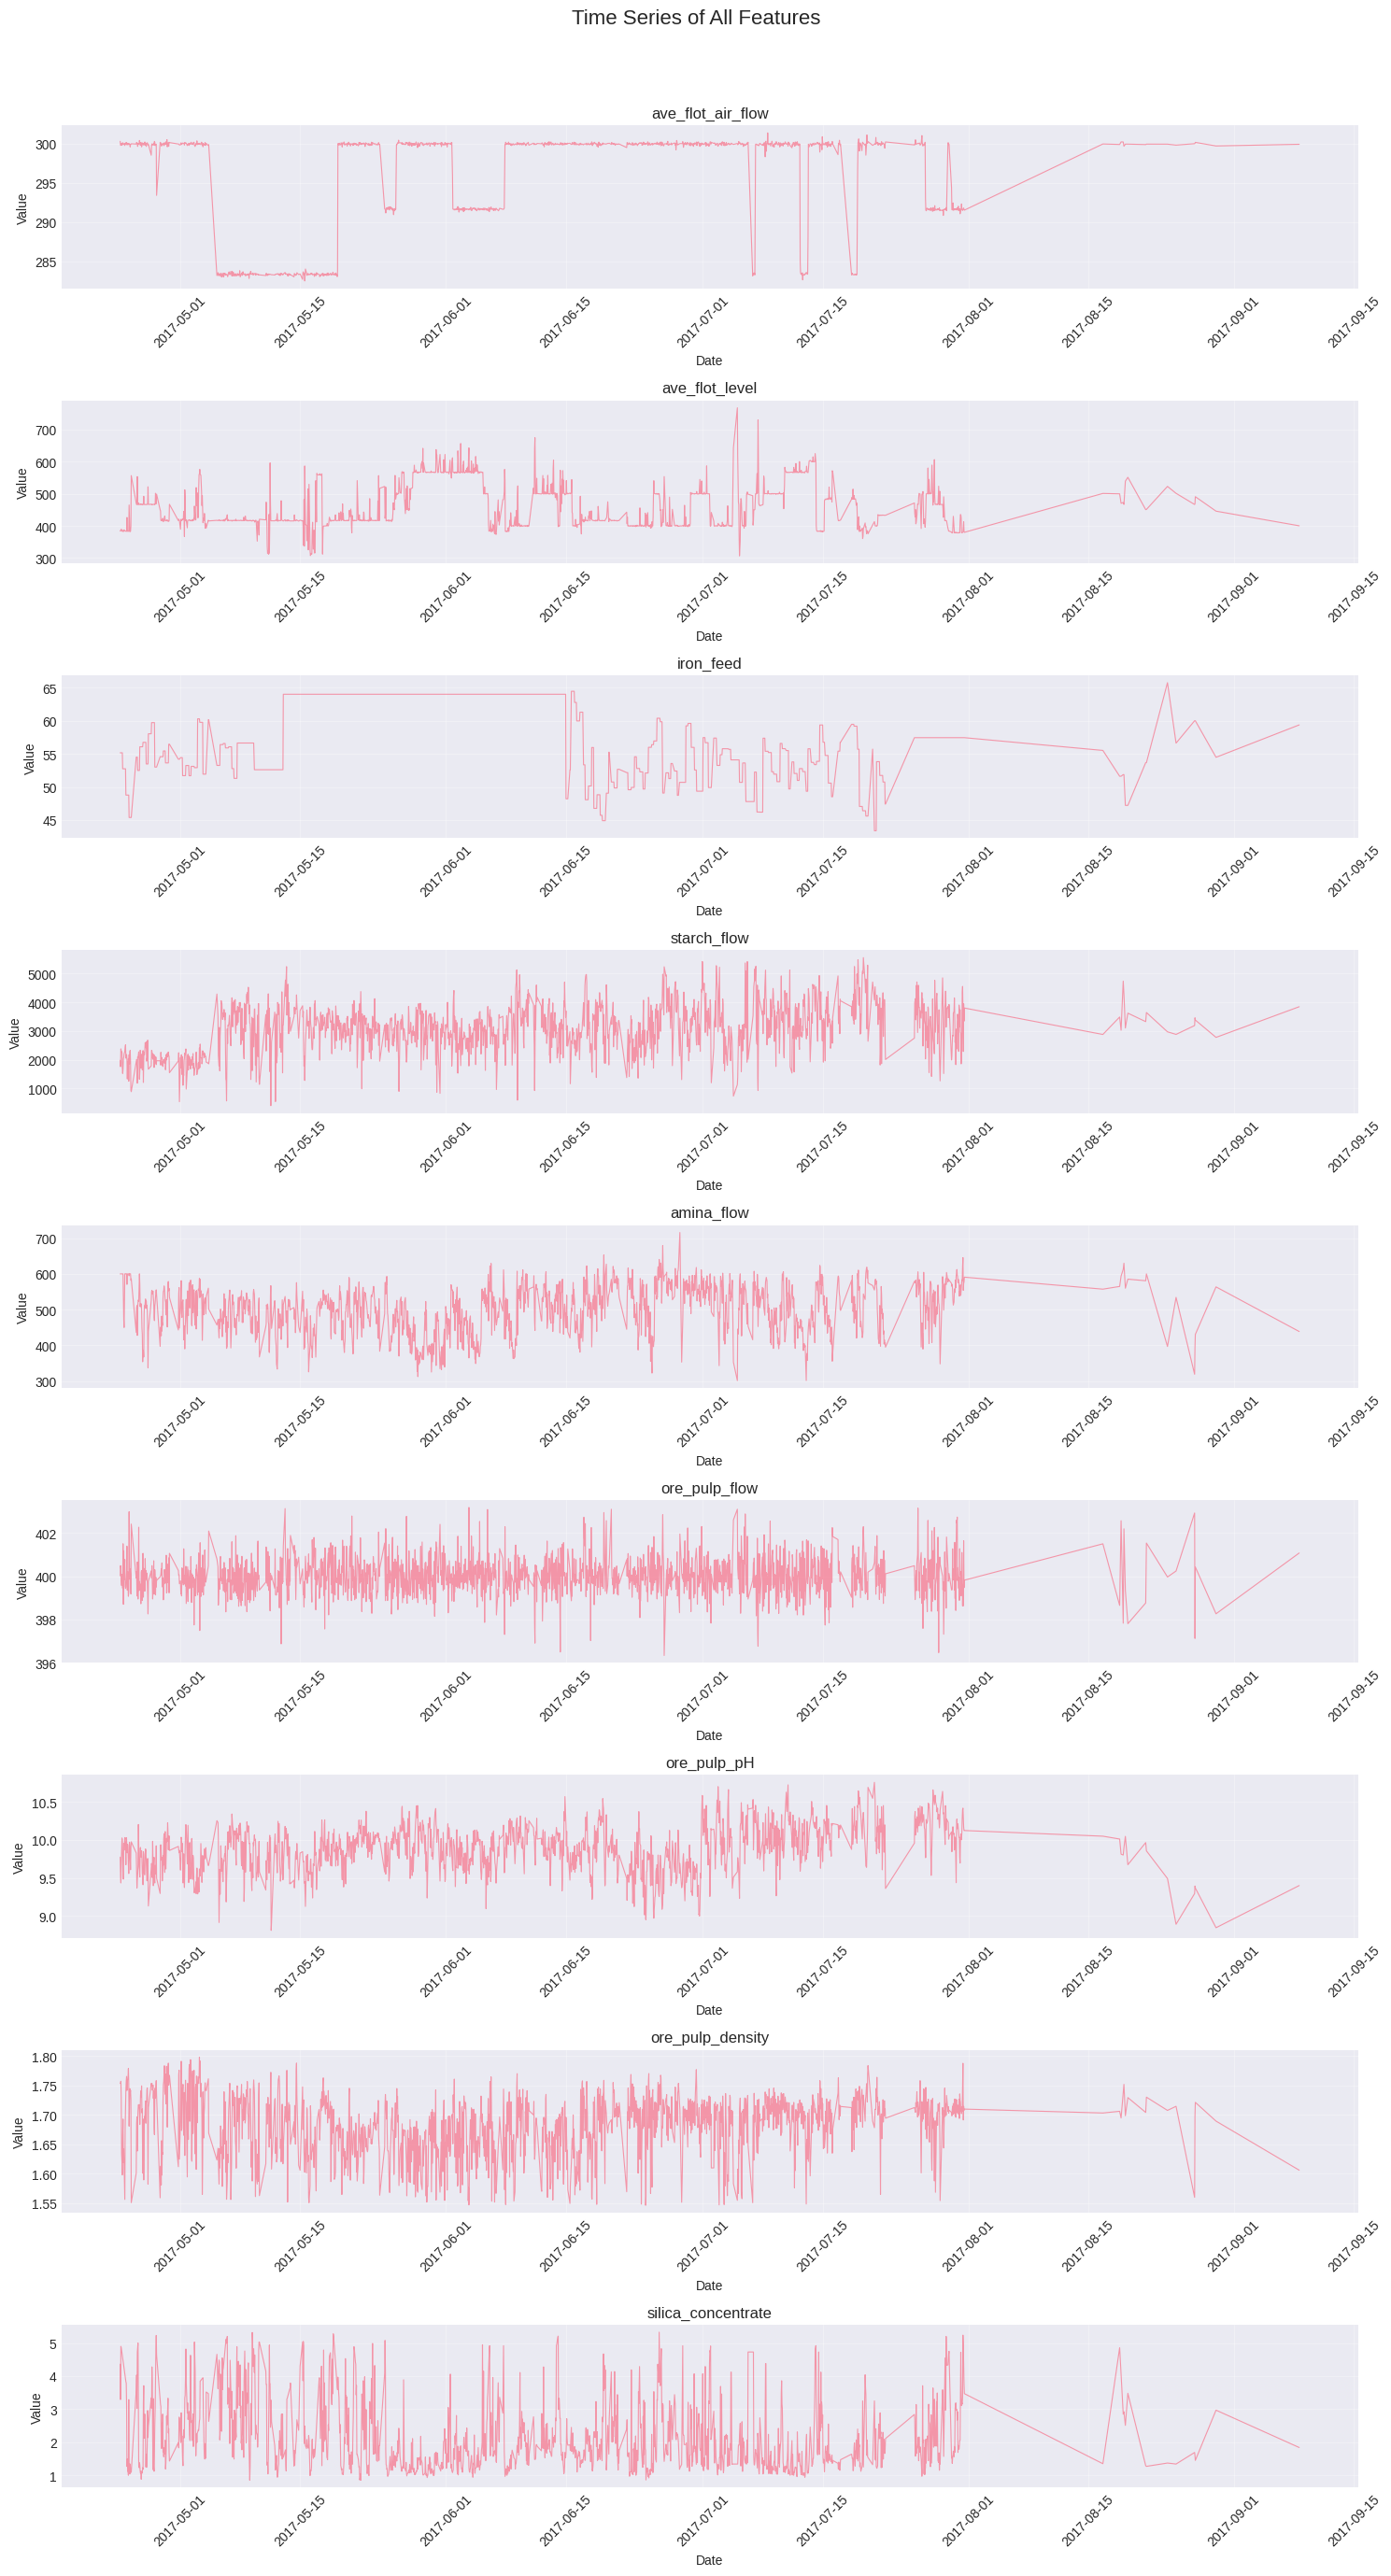

In [10]:
# Set date as index for time series analysis
df_ts = df.set_index('date').sort_index()

# Plot time series for all numerical features
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15, 3 * len(numeric_cols)))
fig.suptitle('Time Series of All Features', fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols):
    axes[i].plot(df_ts.index, df_ts[col], linewidth=0.8, alpha=0.7)
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


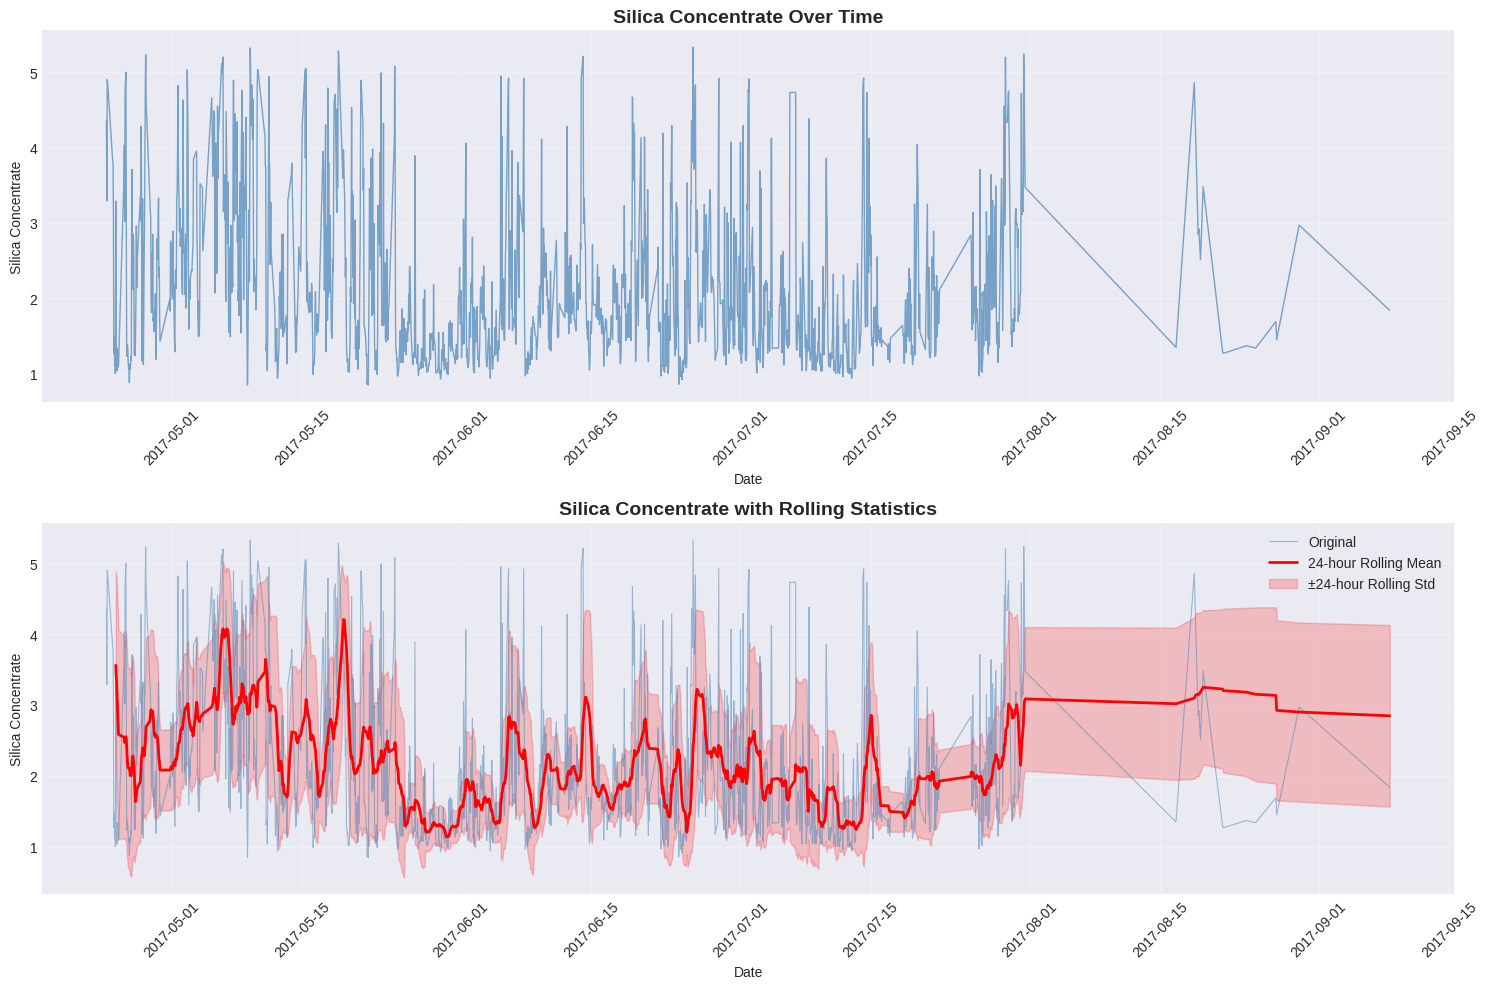

In [11]:
# Focus on target variable: silica_concentrate
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Time series plot
axes[0].plot(df_ts.index, df_ts['silica_concentrate'], linewidth=1, alpha=0.7, color='steelblue')
axes[0].set_title('Silica Concentrate Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Silica Concentrate')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Rolling statistics
window = 24  # 24-hour rolling window
df_ts['silica_rolling_mean'] = df_ts['silica_concentrate'].rolling(window=window).mean()
df_ts['silica_rolling_std'] = df_ts['silica_concentrate'].rolling(window=window).std()

axes[1].plot(df_ts.index, df_ts['silica_concentrate'], linewidth=0.8, alpha=0.5, label='Original', color='steelblue')
axes[1].plot(df_ts.index, df_ts['silica_rolling_mean'], linewidth=2, label=f'{window}-hour Rolling Mean', color='red')
axes[1].fill_between(df_ts.index, 
                     df_ts['silica_rolling_mean'] - df_ts['silica_rolling_std'],
                     df_ts['silica_rolling_mean'] + df_ts['silica_rolling_std'],
                     alpha=0.2, color='red', label=f'±{window}-hour Rolling Std')
axes[1].set_title('Silica Concentrate with Rolling Statistics', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Silica Concentrate')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


HOURLY PATTERNS IN SILICA CONCENTRATE
      mean   std  count
hour                   
0    2.202 1.121     76
1    2.106 0.939     78
2    2.092 1.059     80
3    2.111 1.094     80
4    2.045 0.939     79
5    2.154 1.103     75
6    2.165 1.010     81
7    2.453 1.172     81
8    2.179 0.997     79
9    2.220 1.109     76
10   2.337 1.232     76
11   2.124 1.083     71
12   2.191 1.016     67
13   2.262 1.096     73
14   2.156 1.005     72
15   2.115 0.991     75
16   2.424 1.102     77
17   2.188 0.992     75
18   2.149 1.047     71
19   1.939 0.834     74
20   2.034 0.979     75
21   2.140 0.989     76
22   2.116 1.144     79
23   1.953 0.972     71


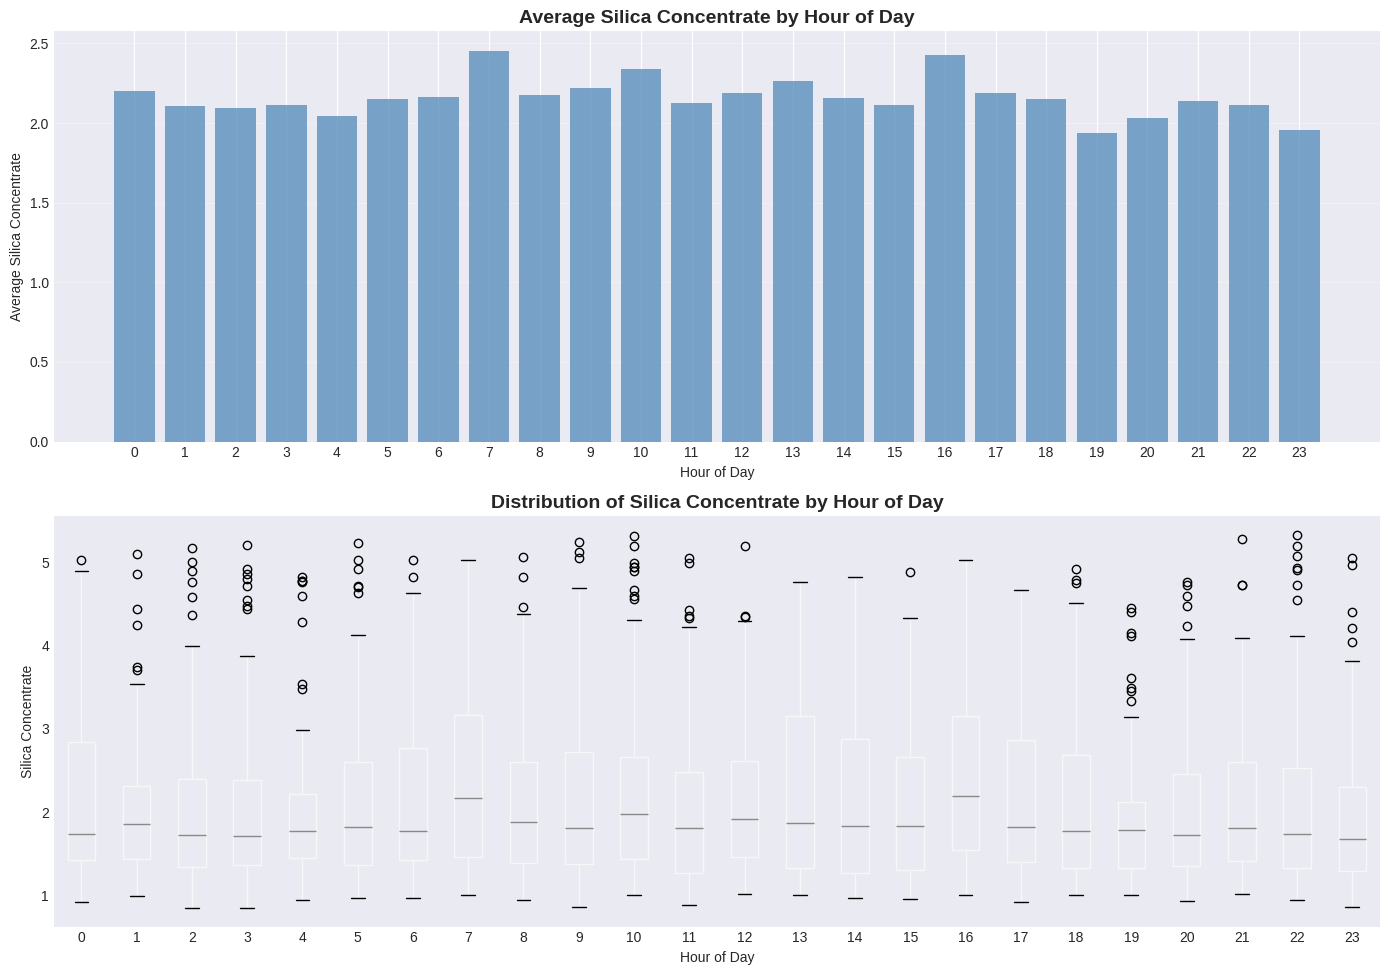

In [12]:
# Extract time-based features
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Analyze patterns by hour
hourly_pattern = df.groupby('hour')['silica_concentrate'].agg(['mean', 'std', 'count'])
print("=" * 60)
print("HOURLY PATTERNS IN SILICA CONCENTRATE")
print("=" * 60)
print(hourly_pattern)

# Visualize hourly patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Mean silica concentrate by hour
hourly_mean = df.groupby('hour')['silica_concentrate'].mean()
axes[0].bar(hourly_mean.index, hourly_mean.values, alpha=0.7, color='steelblue')
axes[0].set_title('Average Silica Concentrate by Hour of Day', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Silica Concentrate')
axes[0].set_xticks(range(24))
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot by hour
df.boxplot(column='silica_concentrate', by='hour', ax=axes[1], grid=False)
axes[1].set_title('Distribution of Silica Concentrate by Hour of Day', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Silica Concentrate')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


## 5. Distribution Analysis


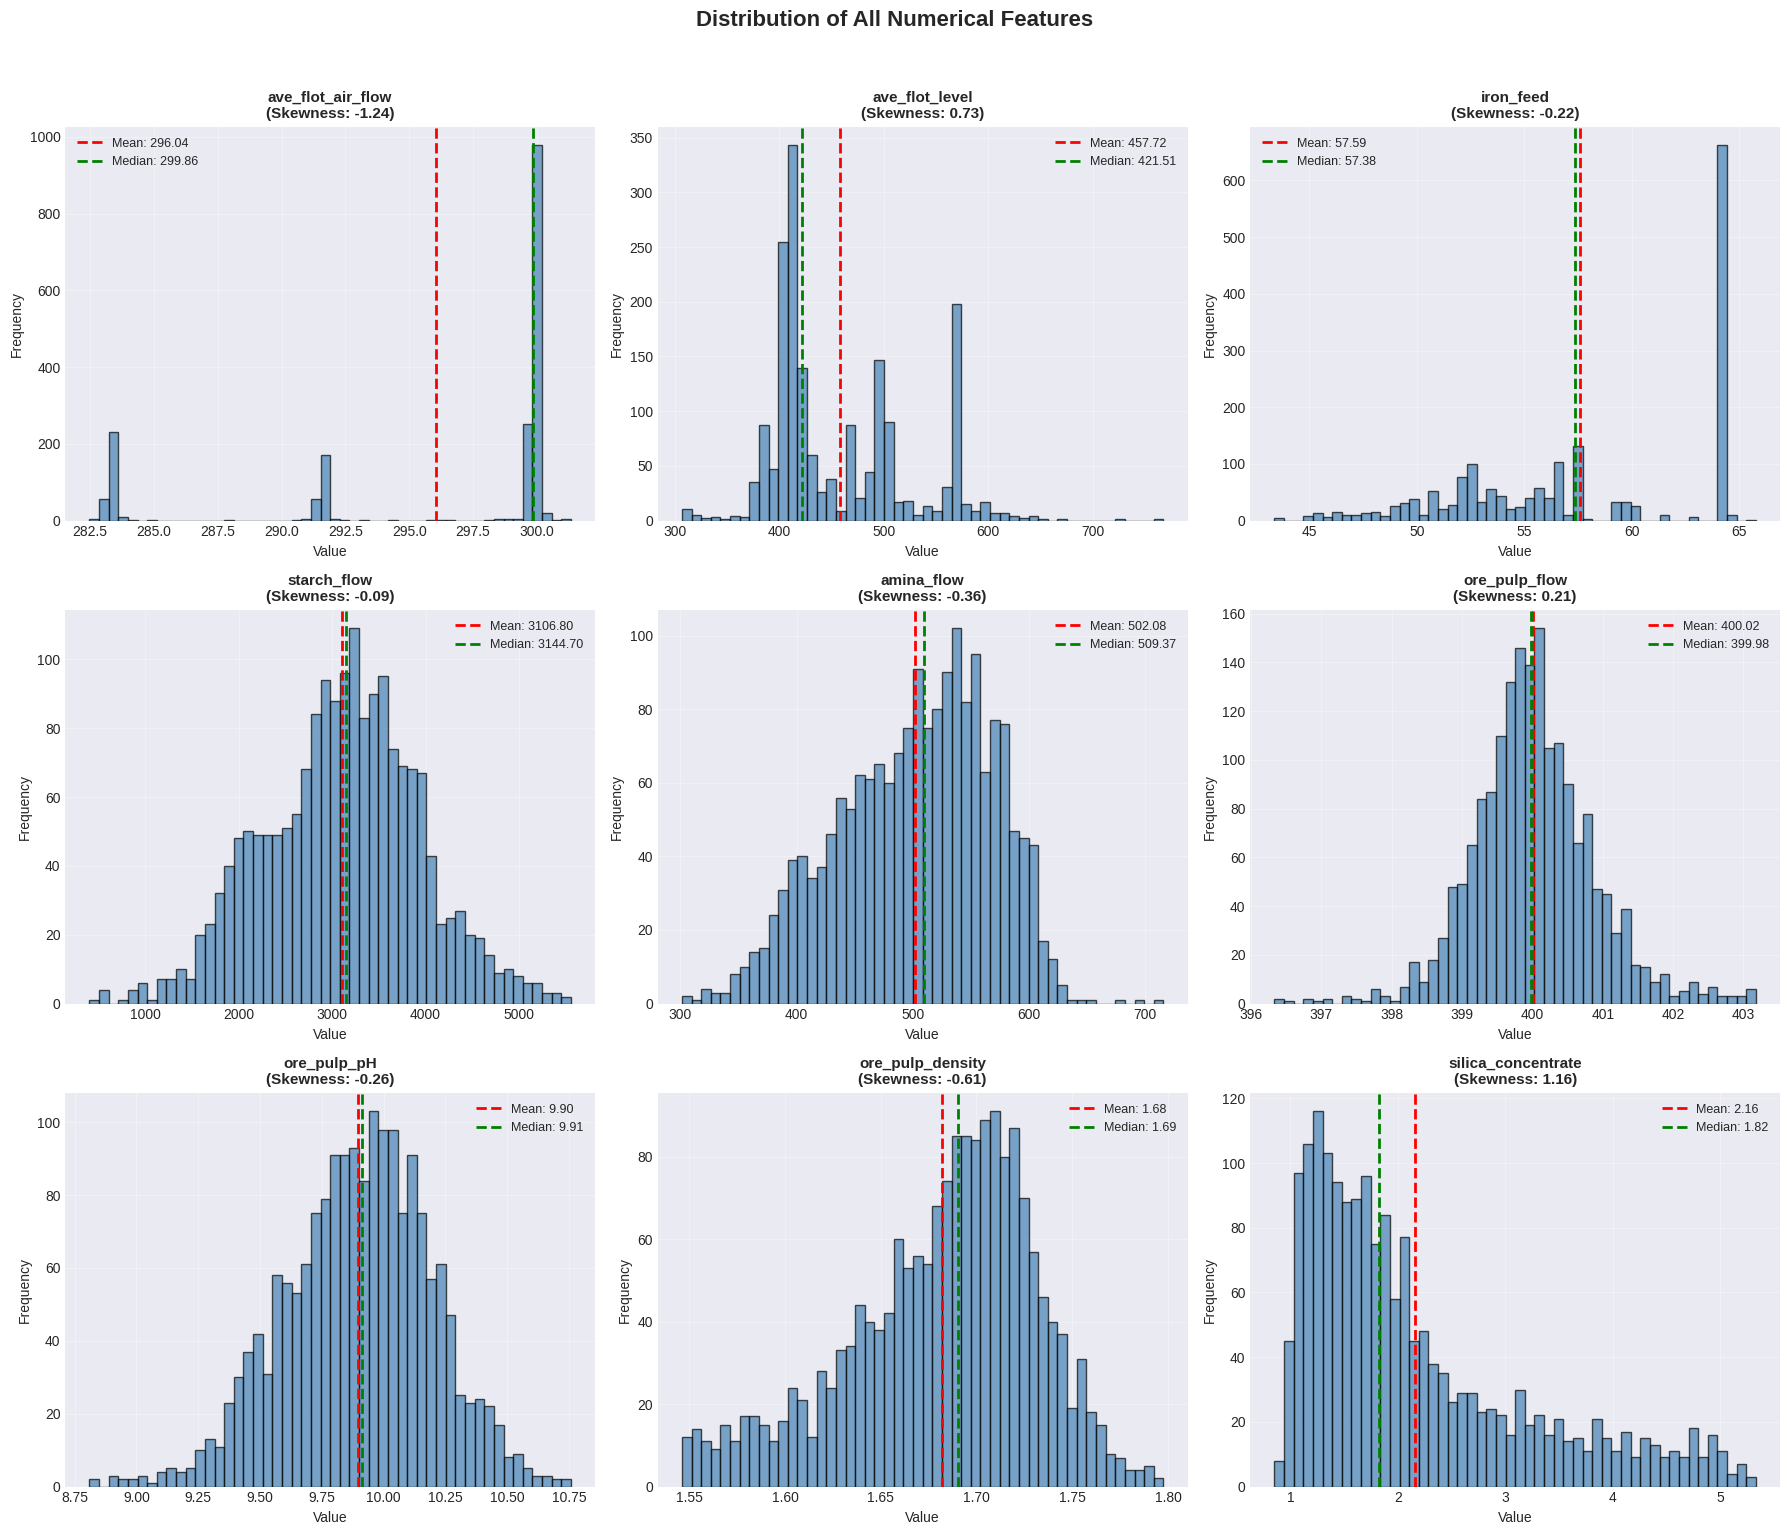

In [13]:
# Distribution plots for all numerical features
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Histogram
    ax.hist(df[col], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    ax.set_title(f'{col}\n(Skewness: {df[col].skew():.2f})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle('Distribution of All Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


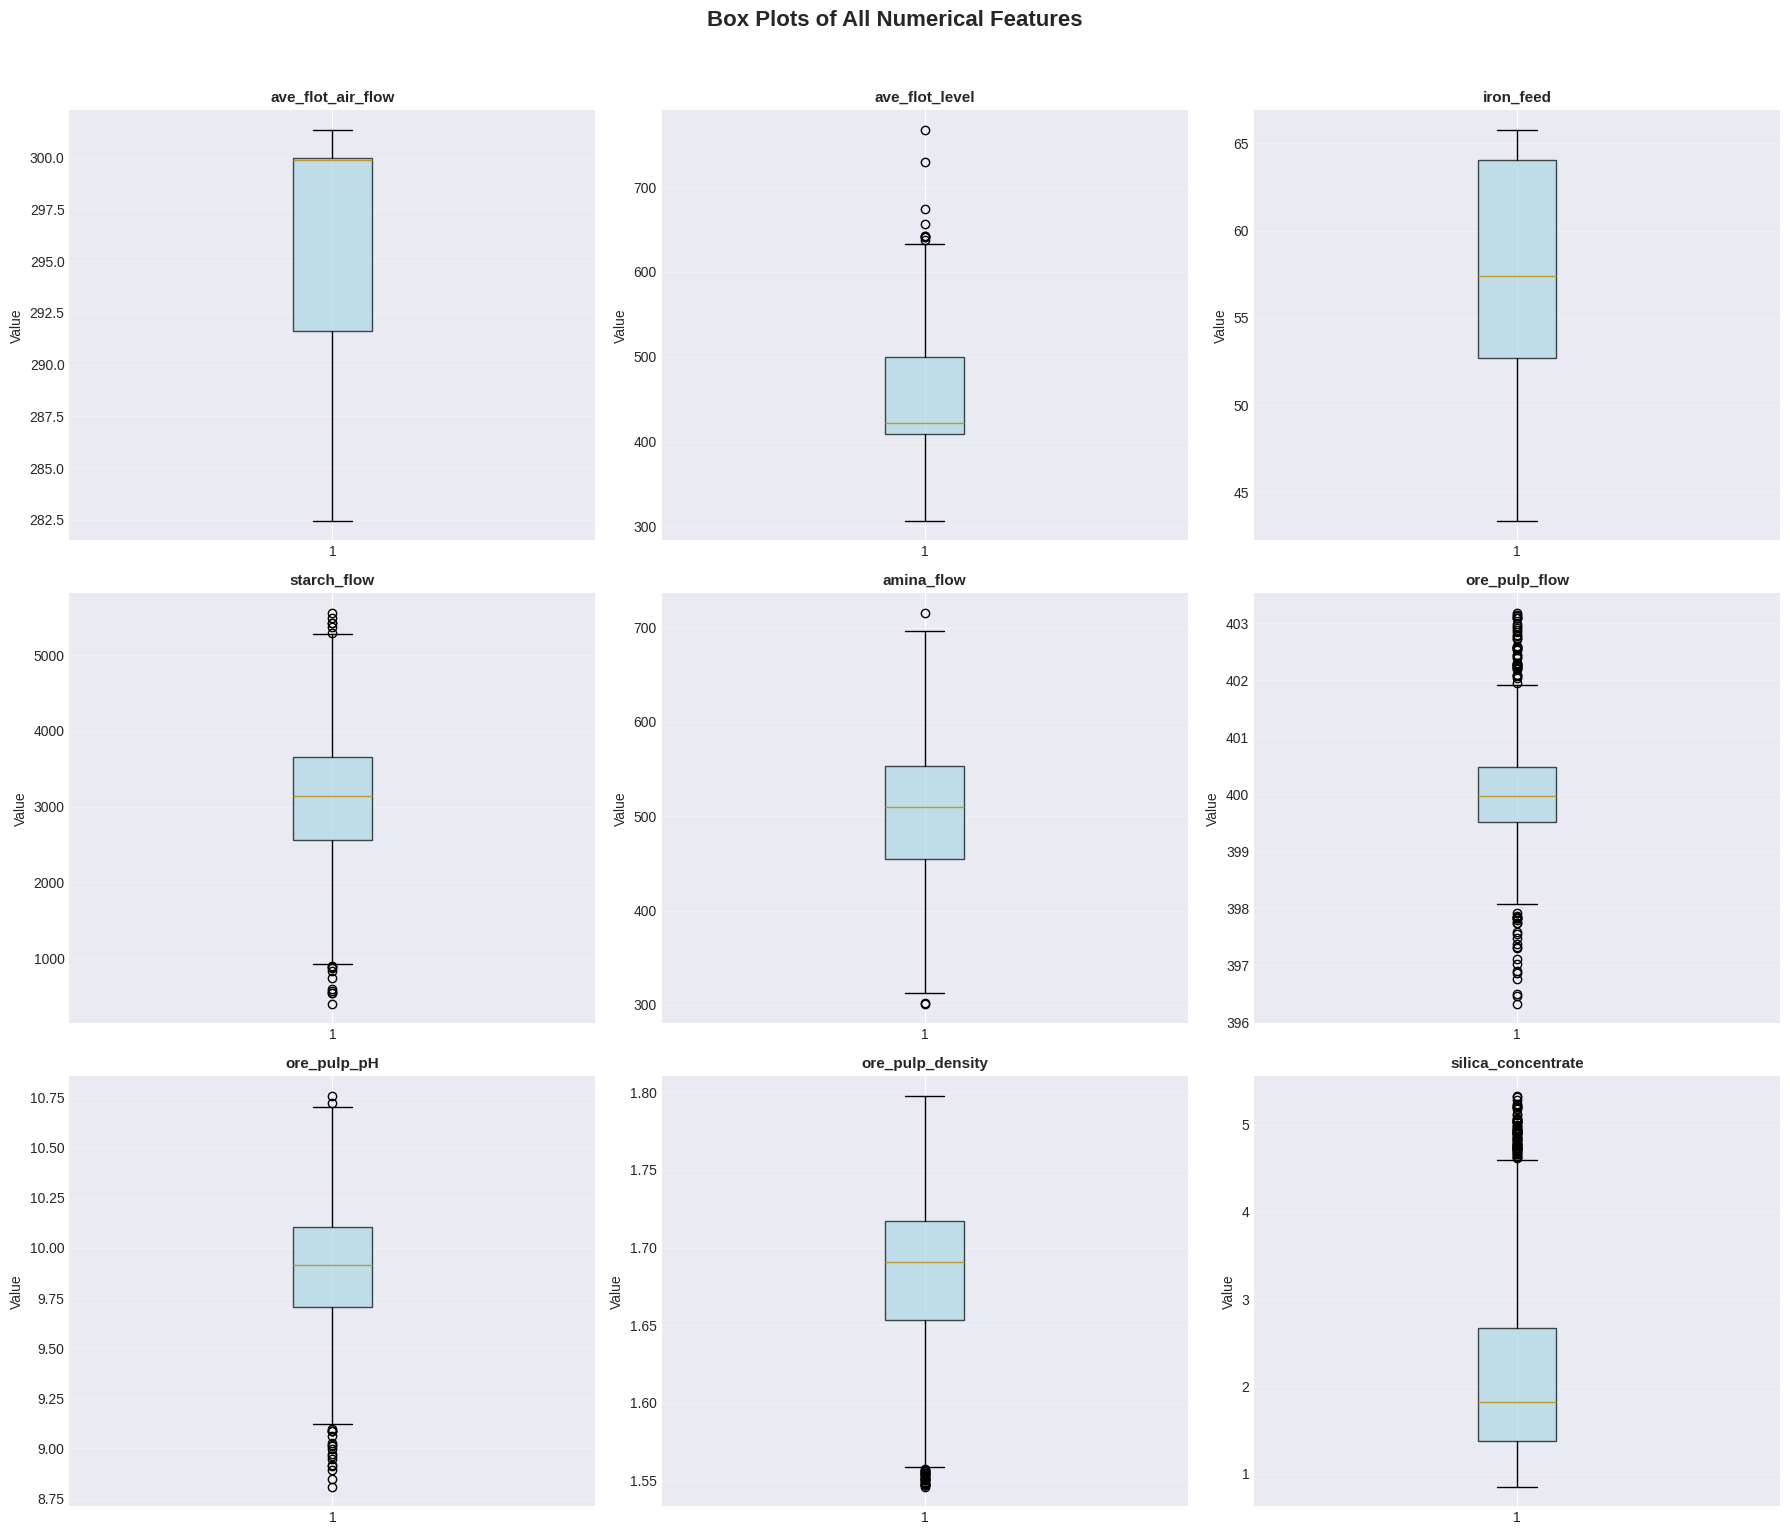

In [14]:
# Box plots for all features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    bp = ax.boxplot(df[col], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    ax.set_title(f'{col}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3, axis='y')

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle('Box Plots of All Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 6. Correlation Analysis


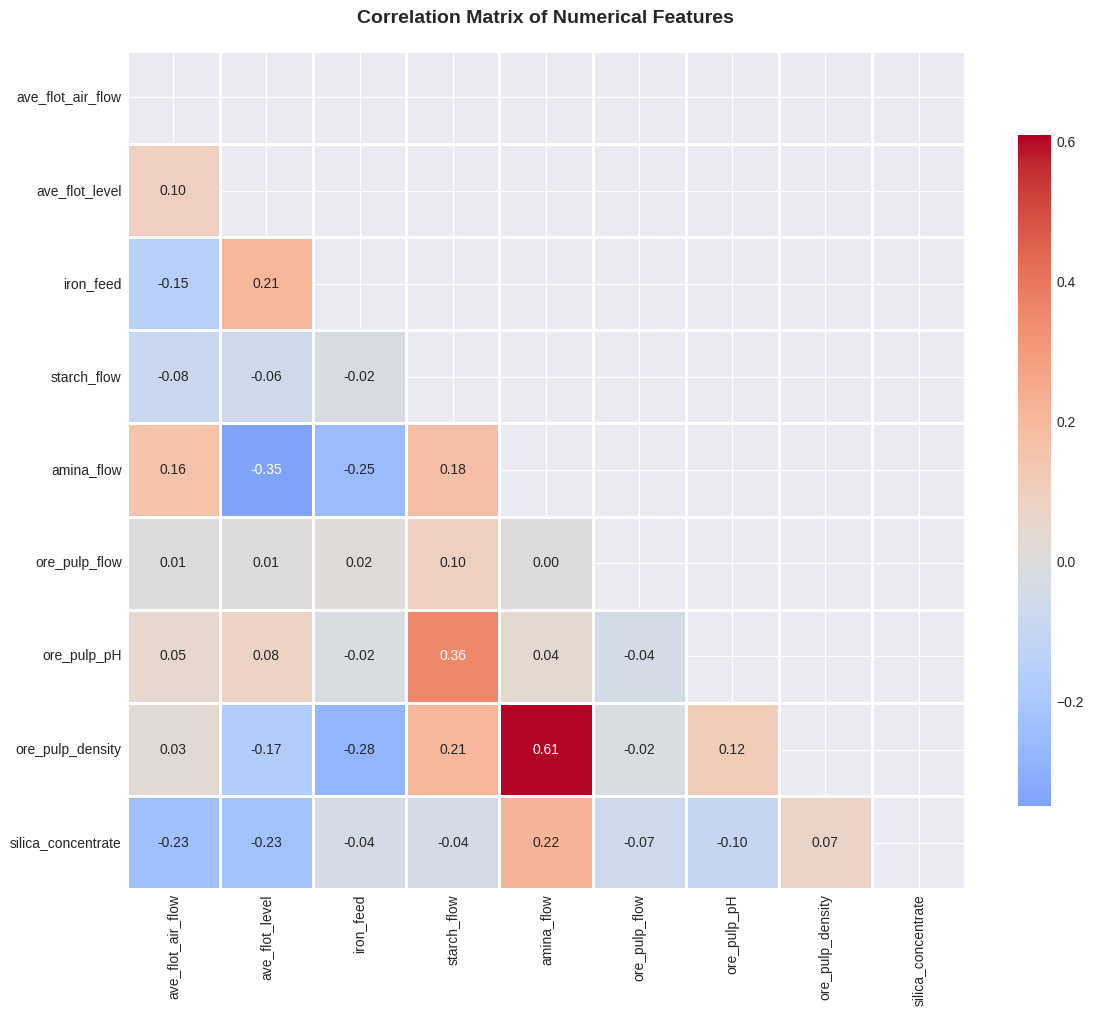

In [15]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


CORRELATION WITH TARGET VARIABLE (silica_concentrate)
ave_flot_air_flow   -0.235
ave_flot_level      -0.228
amina_flow           0.221
ore_pulp_pH         -0.096
ore_pulp_density     0.071
ore_pulp_flow       -0.066
starch_flow         -0.043
iron_feed           -0.040
Name: silica_concentrate, dtype: float64


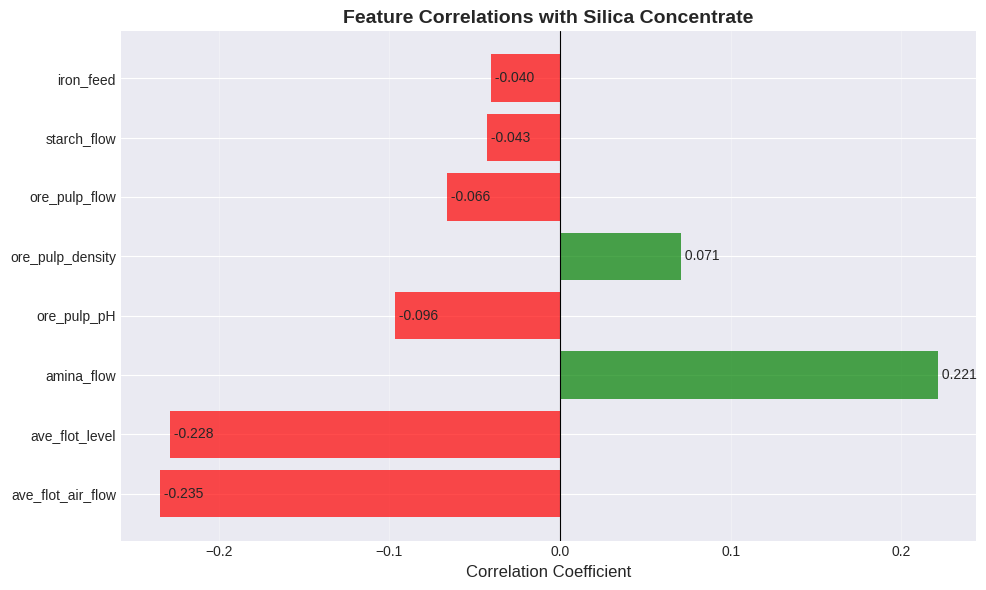

In [16]:
# Focus on correlations with target variable (silica_concentrate)
target_corr = correlation_matrix['silica_concentrate'].sort_values(key=abs, ascending=False)
target_corr = target_corr[target_corr.index != 'silica_concentrate']  # Remove self-correlation

print("=" * 60)
print("CORRELATION WITH TARGET VARIABLE (silica_concentrate)")
print("=" * 60)
print(target_corr)

# Visualize correlations with target
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in target_corr.values]
bars = ax.barh(target_corr.index, target_corr.values, color=colors, alpha=0.7)
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title('Feature Correlations with Silica Concentrate', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, val) in enumerate(target_corr.items()):
    ax.text(val, i, f' {val:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


## 7. Outlier Detection


In [17]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=" * 60)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 60)

outlier_summary = []
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    outlier_summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier Percentage': outlier_percent,
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Min Value': df[col].min(),
        'Max Value': df[col].max()
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))


OUTLIER DETECTION (IQR Method)
           Feature  Outlier Count  Outlier Percentage  Lower Bound  Upper Bound  Min Value  Max Value
 ave_flot_air_flow              0               0.000      279.165      312.440    282.466    301.339
    ave_flot_level              9               0.495      271.575      637.457    306.749    767.640
         iron_feed              0               0.000       35.630       81.070     43.370     65.780
       starch_flow             16               0.881      914.012     5288.861    401.629   5556.094
        amina_flow              3               0.165      307.414      700.363    301.264    715.748
     ore_pulp_flow             66               3.632      398.047      401.944    396.331    403.178
       ore_pulp_pH             19               1.046        9.107       10.702      8.809     10.758
  ore_pulp_density             29               1.596        1.558        1.812      1.546      1.798
silica_concentrate             77               4.2

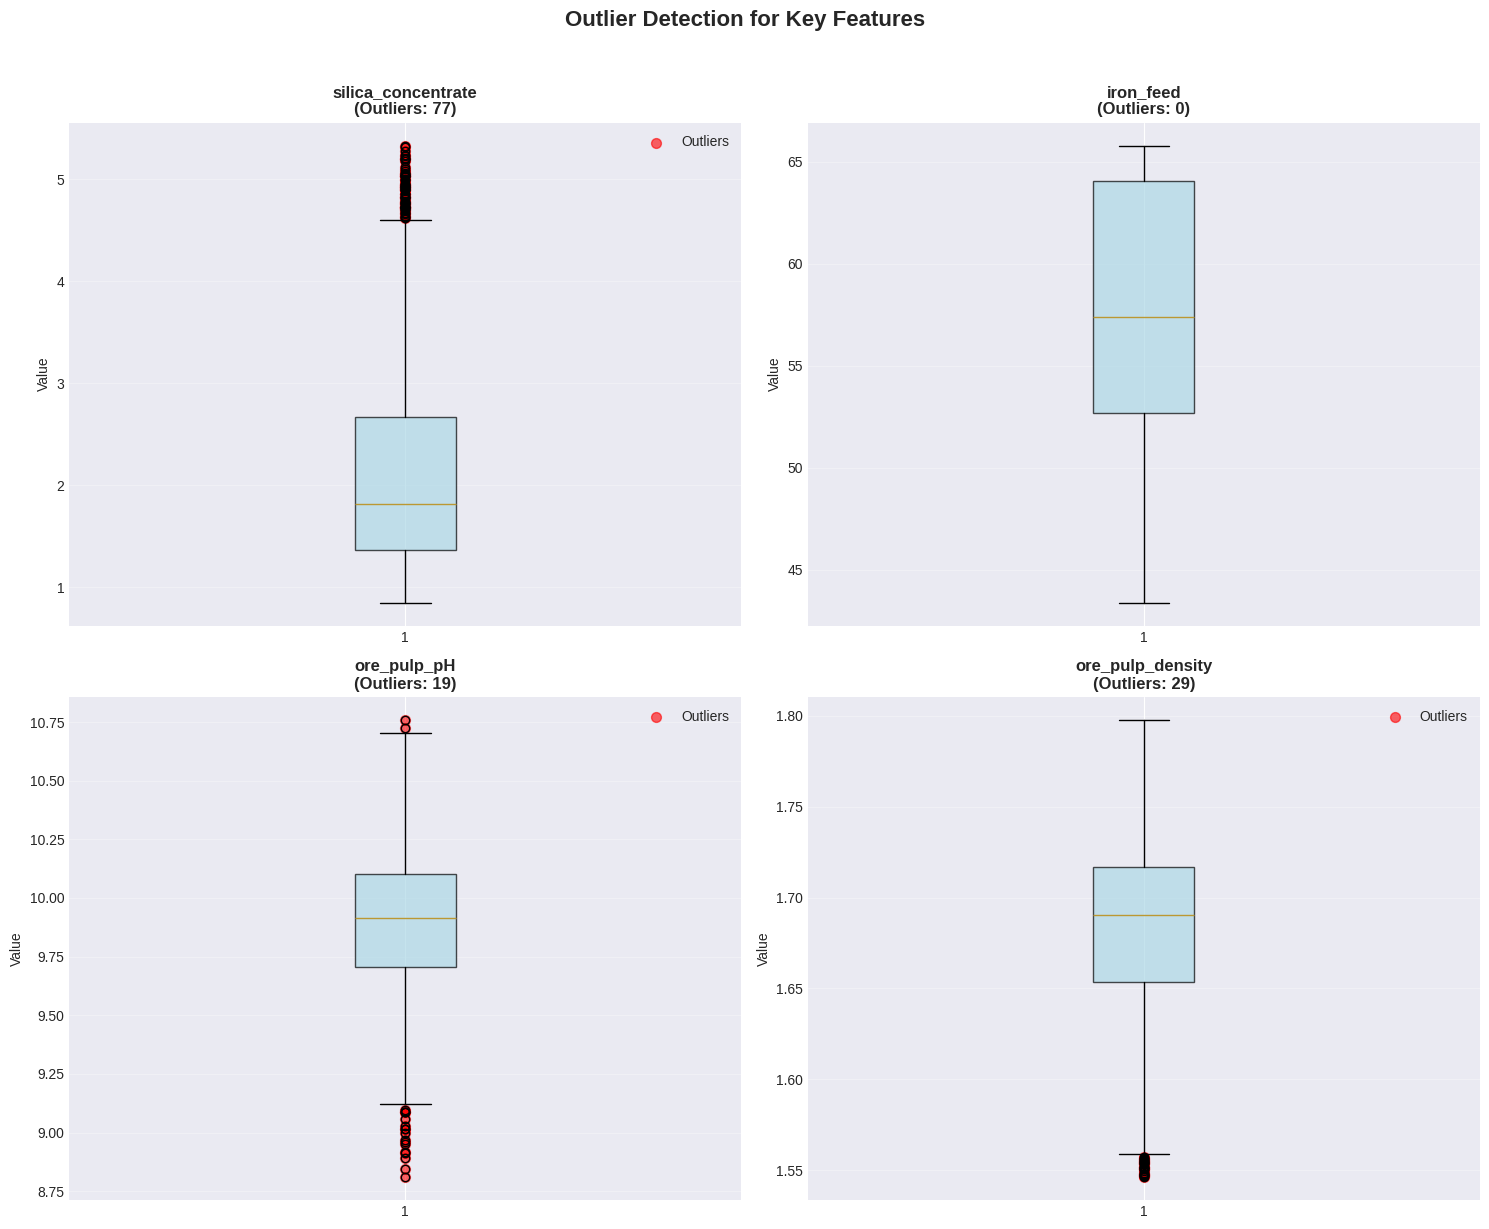

In [18]:
# Visualize outliers for key features
key_features = ['silica_concentrate', 'iron_feed', 'ore_pulp_pH', 'ore_pulp_density']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(key_features):
    ax = axes[i]
    bp = ax.boxplot(df[col], vert=True, patch_artist=True, showfliers=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Highlight outliers
    outliers, lower, upper = detect_outliers_iqr(df, col)
    if len(outliers) > 0:
        ax.scatter([1] * len(outliers), outliers[col].values, 
                  color='red', marker='o', s=50, alpha=0.6, label='Outliers')
    
    ax.set_title(f'{col}\n(Outliers: {len(outliers)})', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3, axis='y')
    if len(outliers) > 0:
        ax.legend()

plt.suptitle('Outlier Detection for Key Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 8. Feature Relationships


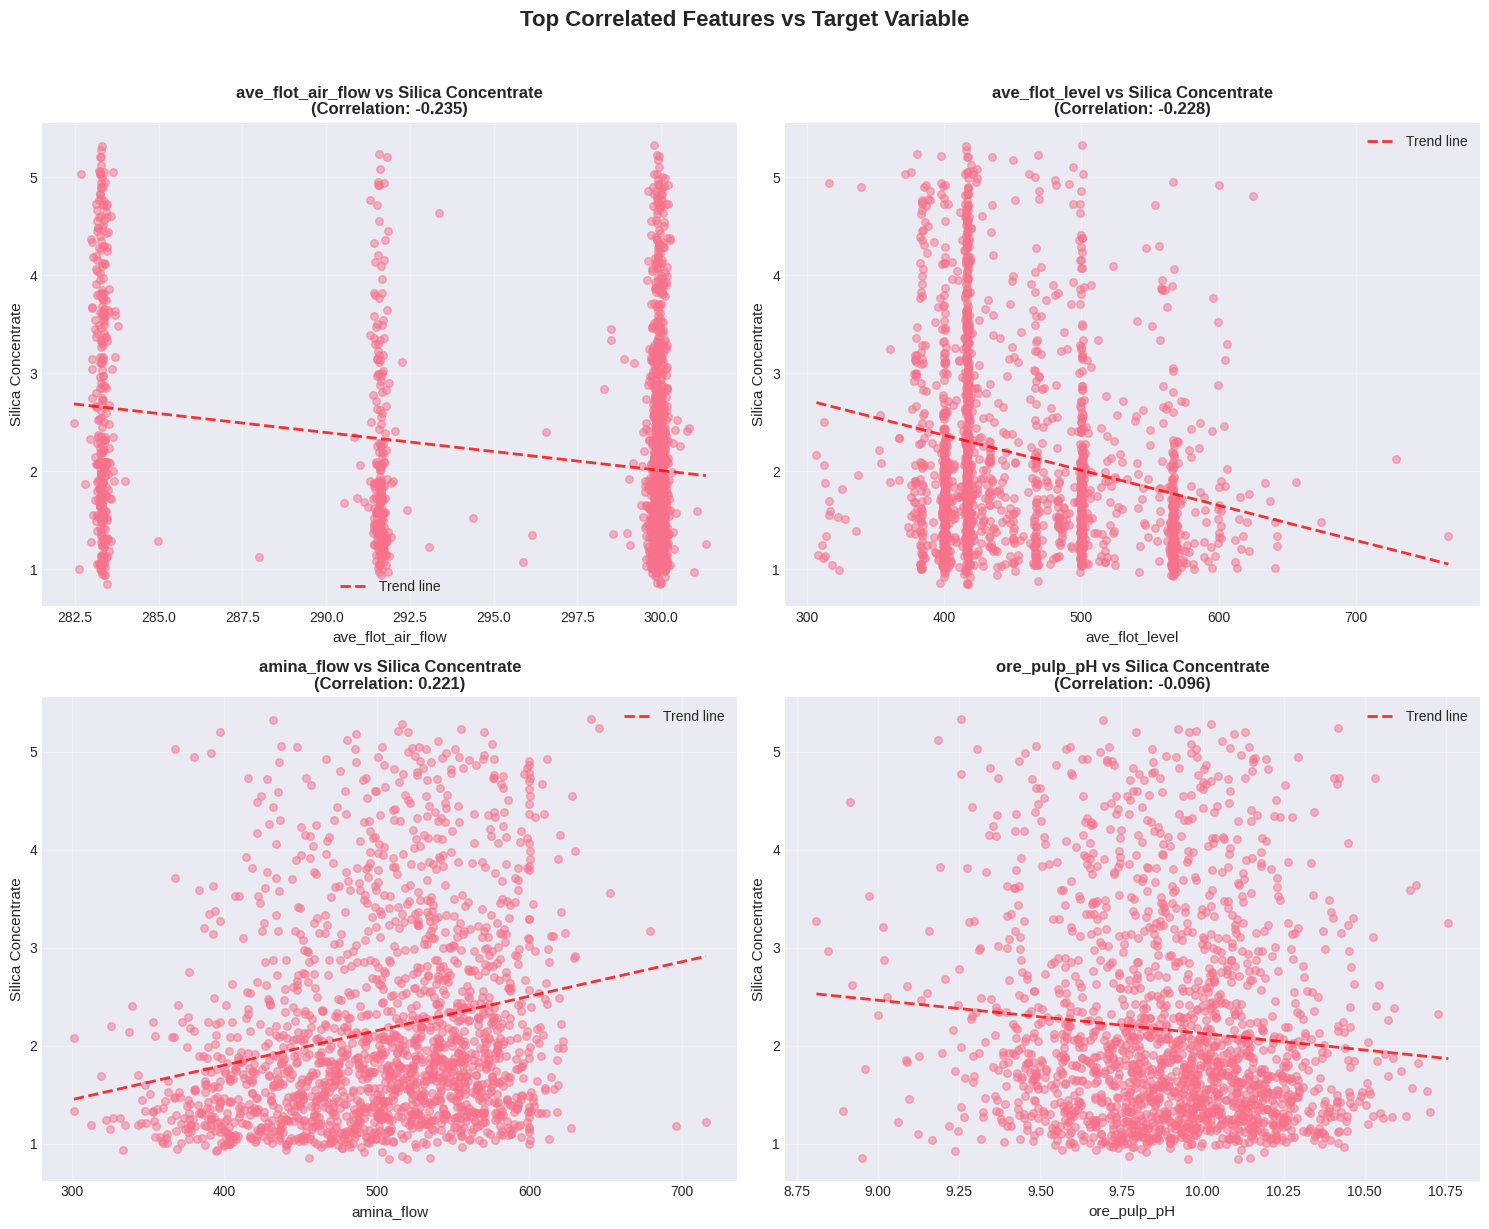

In [19]:
# Scatter plots of top correlated features with target
top_features = target_corr.abs().nlargest(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    ax.scatter(df[feature], df['silica_concentrate'], alpha=0.5, s=30)
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Silica Concentrate', fontsize=11)
    ax.set_title(f'{feature} vs Silica Concentrate\n(Correlation: {target_corr[feature]:.3f})', 
                fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df[feature], df['silica_concentrate'], 1)
    p = np.poly1d(z)
    ax.plot(df[feature].sort_values(), p(df[feature].sort_values()), 
           "r--", alpha=0.8, linewidth=2, label='Trend line')
    ax.legend()

plt.suptitle('Top Correlated Features vs Target Variable', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


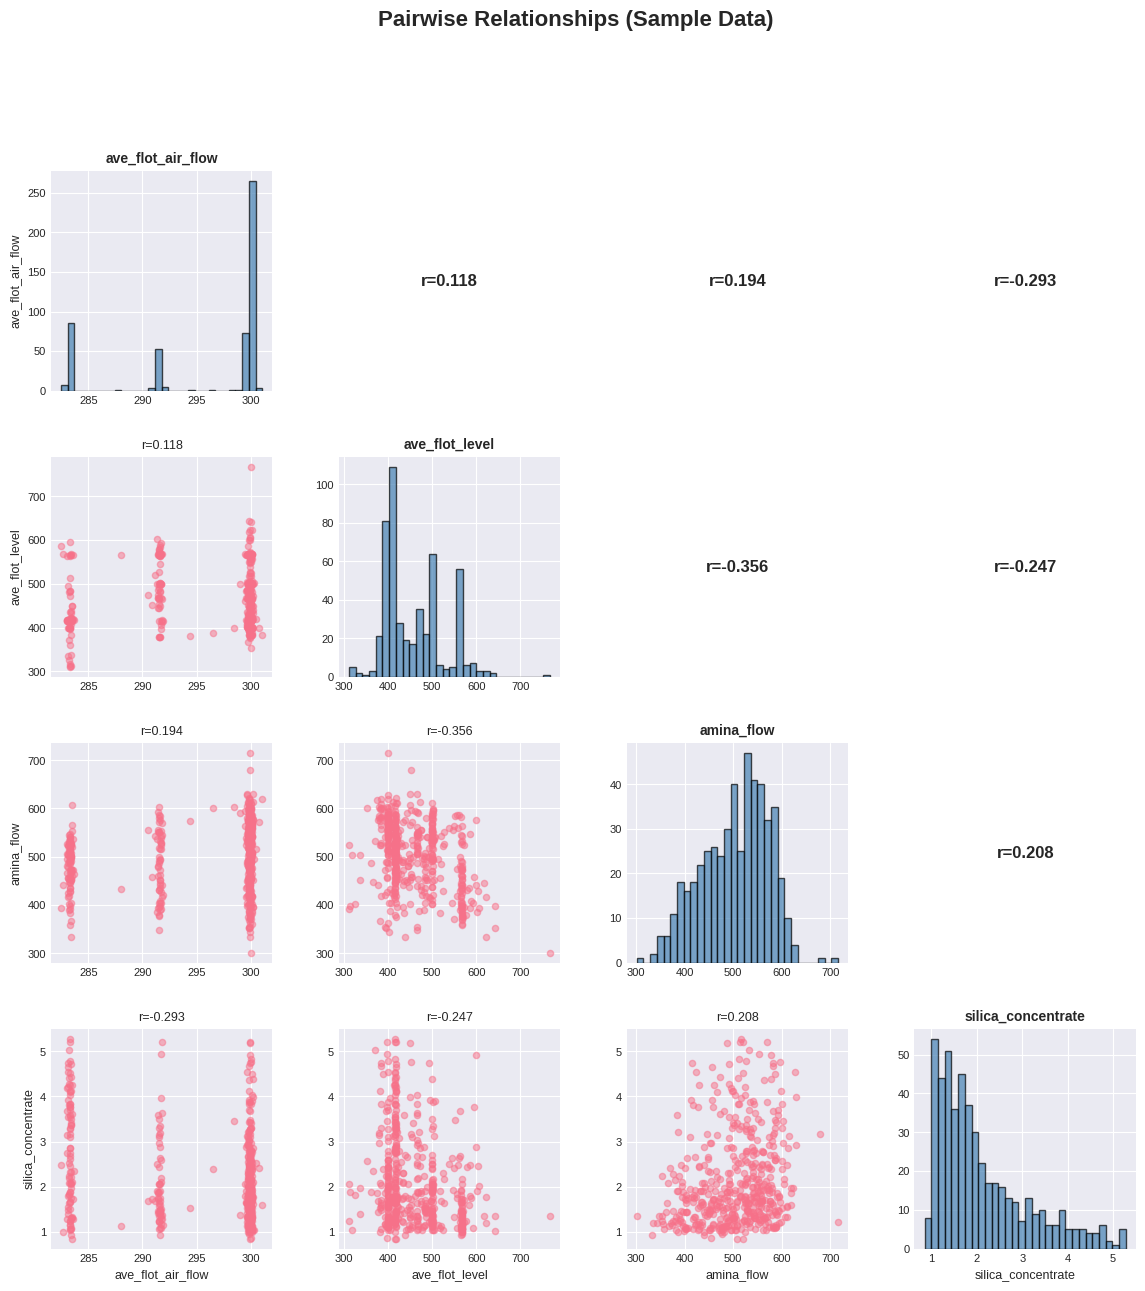

In [20]:
# Pair plot for top features (sample data for performance)
sample_size = min(500, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

top_features_with_target = top_features[:3] + ['silica_concentrate']
pair_plot_df = df_sample[top_features_with_target]

fig = plt.figure(figsize=(14, 14))
gs = fig.add_gridspec(len(top_features_with_target), len(top_features_with_target), 
                     hspace=0.3, wspace=0.3)

for i, row_feat in enumerate(top_features_with_target):
    for j, col_feat in enumerate(top_features_with_target):
        ax = fig.add_subplot(gs[i, j])
        
        if i == j:
            # Diagonal: histogram
            ax.hist(pair_plot_df[row_feat], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
            ax.set_title(f'{row_feat}', fontsize=10, fontweight='bold')
        elif i > j:
            # Lower triangle: scatter plot
            ax.scatter(pair_plot_df[col_feat], pair_plot_df[row_feat], alpha=0.5, s=20)
            corr_val = pair_plot_df[col_feat].corr(pair_plot_df[row_feat])
            ax.set_title(f'r={corr_val:.3f}', fontsize=9)
        else:
            # Upper triangle: empty or correlation text
            corr_val = pair_plot_df[col_feat].corr(pair_plot_df[row_feat])
            ax.text(0.5, 0.5, f'r={corr_val:.3f}', ha='center', va='center', 
                   fontsize=12, fontweight='bold', transform=ax.transAxes)
            ax.axis('off')
        
        if i == len(top_features_with_target) - 1:
            ax.set_xlabel(col_feat, fontsize=9)
        if j == 0:
            ax.set_ylabel(row_feat, fontsize=9)
        ax.tick_params(labelsize=8)

plt.suptitle('Pairwise Relationships (Sample Data)', fontsize=16, fontweight='bold', y=0.995)
plt.show()


## 9. Summary Statistics and Insights


In [21]:
# Summary statistics for target variable
print("=" * 60)
print("TARGET VARIABLE SUMMARY: silica_concentrate")
print("=" * 60)
target_stats = df['silica_concentrate'].describe()
print(target_stats)

print(f"\nAdditional Statistics:")
print(f"  Range: {df['silica_concentrate'].min():.3f} - {df['silica_concentrate'].max():.3f}")
print(f"  Coefficient of Variation: {(df['silica_concentrate'].std() / df['silica_concentrate'].mean()) * 100:.2f}%")
print(f"  Skewness: {df['silica_concentrate'].skew():.3f}")
print(f"  Kurtosis: {df['silica_concentrate'].kurtosis():.3f}")


TARGET VARIABLE SUMMARY: silica_concentrate
count   1817.000
mean       2.162
std        1.047
min        0.850
25%        1.370
50%        1.820
75%        2.670
max        5.330
Name: silica_concentrate, dtype: float64

Additional Statistics:
  Range: 0.850 - 5.330
  Coefficient of Variation: 48.45%
  Skewness: 1.157
  Kurtosis: 0.468


In [22]:
# Key insights summary
print("\n" + "=" * 60)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("=" * 60)

print("\n1. DATA OVERVIEW:")
print(f"   - Total records: {len(df):,}")
print(f"   - Time period: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"   - Features: {len(numeric_cols)} numerical features")
print(f"   - Missing values: {df.isnull().sum().sum()} ({(df.isnull().sum().sum() / len(df) * 100):.2f}%)")

print("\n2. TARGET VARIABLE (silica_concentrate):")
print(f"   - Mean: {df['silica_concentrate'].mean():.3f}")
print(f"   - Std: {df['silica_concentrate'].std():.3f}")
print(f"   - Range: {df['silica_concentrate'].min():.3f} - {df['silica_concentrate'].max():.3f}")

print("\n3. TOP CORRELATED FEATURES WITH TARGET:")
for i, (feat, corr) in enumerate(target_corr.abs().nlargest(3).items(), 1):
    direction = "positive" if target_corr[feat] > 0 else "negative"
    print(f"   {i}. {feat}: {target_corr[feat]:.3f} ({direction} correlation)")

print("\n4. DATA QUALITY:")
print(f"   - Duplicate rows: {df.duplicated().sum()}")
outlier_counts = [len(detect_outliers_iqr(df, col)[0]) for col in numeric_cols]
print(f"   - Features with outliers: {sum(1 for count in outlier_counts if count > 0)}/{len(numeric_cols)}")

print("\n5. DISTRIBUTION CHARACTERISTICS:")
high_skew = [col for col in numeric_cols if abs(df[col].skew()) > 1]
if high_skew:
    print(f"   - Highly skewed features (|skew| > 1): {', '.join(high_skew)}")
else:
    print("   - No highly skewed features detected")

print("\n" + "=" * 60)



KEY INSIGHTS FROM DATA EXPLORATION

1. DATA OVERVIEW:
   - Total records: 1,817
   - Time period: 2017-04-24 to 2017-09-08
   - Features: 9 numerical features
   - Missing values: 0 (0.00%)

2. TARGET VARIABLE (silica_concentrate):
   - Mean: 2.162
   - Std: 1.047
   - Range: 0.850 - 5.330

3. TOP CORRELATED FEATURES WITH TARGET:
   1. ave_flot_air_flow: -0.235 (negative correlation)
   2. ave_flot_level: -0.228 (negative correlation)
   3. amina_flow: 0.221 (positive correlation)

4. DATA QUALITY:
   - Duplicate rows: 0
   - Features with outliers: 7/9

5. DISTRIBUTION CHARACTERISTICS:
   - Highly skewed features (|skew| > 1): ave_flot_air_flow, silica_concentrate



## 10. Next Steps

1. **Feature Engineering:**
   - Create time-based features (hour, day of week, etc.)
   - lag features for time series modeling?
   - Explore interaction terms between highly correlated features

2. **Data Preprocessing:**
   - Outlier-Handling if they represent measurement errors
   - Address any missing values if they appear in future data

3. **Modeling Considerations:**
   - Time series models (ARIMA, LSTM) may be appropriate given temporal structure
   - Feature selection based on correlations?
   - Cross-validation should respect temporal order

4. **Further Analysis:**
   - Relationships between process variables and target
   - Analyze operational regimes or patterns
   - Explore non-linear relationships
